# The Connected States of America 
##  Unsupervised Machine Learning Final Project for DTSA 5510
Prepared by Ryan Birmingham;
See https://github.com/birm/The-Connected-States-of-America

# Motivation and Sources

As things are to day, information and connectedness have greater influence on peoples day to day lives than do most other factors. However, within the United States, the nature of this connection may be variable based upon location.

To try to determine patterns in how connection and day to day life actually works in the United States, I found some datasets with latitude and longitude components. One of which is a dataset of cellular towers (accessed from https://www.kaggle.com/datasets/jahaidulislam/cellular-towers-in-usa). Cellular towers are a good metric for a connected personal economy, as many things in the service economy rely heavily or entirely on mobile applications and thus mobile networks.

To represent the personal service economy, I found a dataset for uber eats restaurants ( accessed from https://www.kaggle.com/datasets/ahmedshahriarsakib/uber-eats-usa-restaurants-menus). This might be a partial proxy for a connectedness-driven economy.

Finally, many of these things may be dependent on population, so as a control and for possible feature engineering, I found a cities dataset with latitude, longitude, and population (accessed at https://www.kaggle.com/datasets/max-mind/world-cities-database). 



# The Data
Since each of these is likely to have separate challenges, I'm going to do a basic exploration and cleanup of each independently, then work on finding a good way to consistently unify them.

In [5]:
! ls data/

airbnb_listings_usa.csv  celltowers.csv  restaurants.csv  worldcitiespop.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
towers_raw = pd.read_csv('data/celltowers.csv')
rest_raw = pd.read_csv('data/restaurants.csv')
pop_raw = pd.read_csv('data/worldcitiespop.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Cell Towers

In [7]:
towers_raw.head()

,X,Y,OBJECTID,UniqSysID,Licensee,Callsign,LocNum,LatDeg,LatMin,LatSec,...,Nepa,QZone,TowReg,SupStruc,AllStruc,StrucType,LicStatus,latdec,londec,url
0,-9.048580e+06,4.669819e+06,1,11497,AT&T Mobility Spectrum LLC,KNKN848,6,38,38,13.5,...,N,,1002593,123.1,125.6,GTOWER,A,38.637083,-81.284778,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
1,-9.085677e+06,4.727033e+06,2,11497,AT&T Mobility Spectrum LLC,KNKN848,7,39,2,14.7,...,N,,0,55.2,59.1,LTOWER,A,39.037417,-81.618028,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
2,-9.026007e+06,4.715856e+06,3,11497,AT&T Mobility Spectrum LLC,KNKN848,18,38,57,33.8,...,N,,1274613,121.9,128.0,LTOWER,A,38.959389,-81.082000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
3,-9.086453e+06,4.673838e+06,4,11497,AT&T Mobility Spectrum LLC,KNKN848,9,38,39,55.0,...,N,,1034261,123.1,125.9,GTOWER,A,38.665278,-81.625000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
4,-9.118736e+06,4.699986e+06,5,11497,AT&T Mobility Spectrum LLC,KNKN848,10,38,50,54.4,...,N,,1219729,80.8,83.8,LTOWER,A,38.848444,-81.915000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...


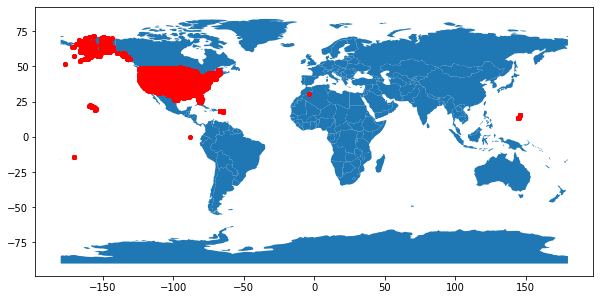

In [11]:
# let's look at the latitude and longitude
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

gdf = GeoDataFrame(towers_raw, geometry=[Point(x) for x in zip(towers_raw['londec'], towers_raw['latdec'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

We'll have to come back to picking a region based on the other datasets.

In [21]:
print(towers_raw.shape)

(47329, 29)


(array([9.1200e+02, 5.4050e+03, 3.4326e+04, 6.6410e+03, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3000e+01]),
 array([-176.70547222, -144.45532222, -112.20517222,  -79.95502222,
         -47.70487222,  -15.45472222,   16.79542778,   49.04557778,
          81.29572778,  113.54587778,  145.79602778]),
 <BarContainer object of 10 artists>)

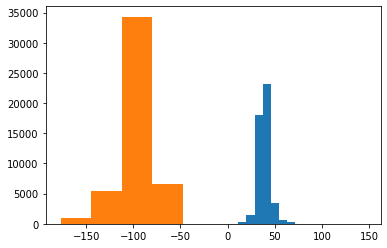

In [22]:
plt.hist(towers_raw['latdec'])
plt.hist(towers_raw['londec'])

# Uber Eats Restaurants

In [19]:
rest_raw.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [23]:
print(rest_raw.shape)

(40227, 11)


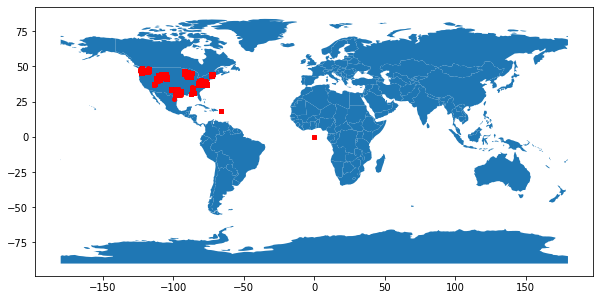

In [26]:
gdf = GeoDataFrame(rest_raw, geometry=[Point(x) for x in zip(rest_raw['lng'], rest_raw['lat'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

We can see the famous null island off of Africa's west coast. Will have to remove  anything there.
Also, this is clearly not a complete list, rather some specific regions. This is the opposite problem we had with the cell data, and we'll need to consider a state or other shapefile to limit the data with.

There are score and rating fields, let's remove any with nans. Let's only consider restaurants with "Complete" entries and at least one rating.


In [32]:
# let's remove nan first
rest_raw.dropna(inplace=True)
print(rest_raw.shape)

(19118, 12)


In [33]:
print("With Score Greater than 2.5: ", len(rest_raw[rest_raw['score'] > 2.5]))
print("With Num Ratings Greater than 100: ", len(rest_raw[rest_raw['ratings'] > 100]))

With Score Greater than 2.5:  19111
With Num Ratings Greater than 100:  4849


(array([1.000e+00, 0.000e+00, 5.000e+00, 1.200e+01, 3.600e+01, 1.290e+02,
        3.300e+02, 1.986e+03, 7.961e+03, 8.658e+03]),
 array([1.3 , 1.67, 2.04, 2.41, 2.78, 3.15, 3.52, 3.89, 4.26, 4.63, 5.  ]),
 <BarContainer object of 10 artists>)

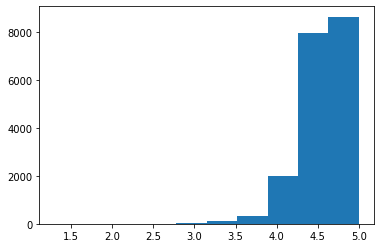

In [34]:
plt.hist(rest_raw['score'])

(array([10143.,  4540.,  1938.,  1809.,   244.,   124.,    86.,    55.,
           35.,   144.]),
 array([ 10.,  59., 108., 157., 206., 255., 304., 353., 402., 451., 500.]),
 <BarContainer object of 10 artists>)

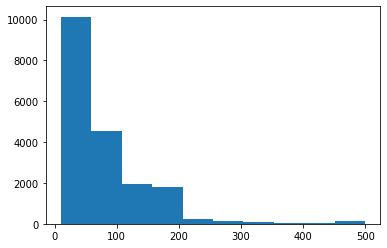

In [35]:
plt.hist(rest_raw['ratings'])

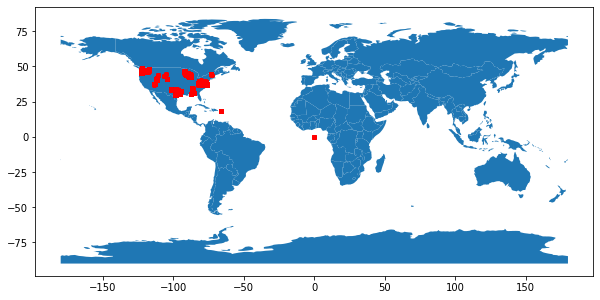

In [36]:
# has cleaning NaNs changed the map?
gdf = GeoDataFrame(rest_raw, geometry=[Point(x) for x in zip(rest_raw['lng'], rest_raw['lat'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

There are some subtle differences in the map data after some cleaning, especially around what seems to be the Colorado area.

# Cities and Populations

In [37]:
pop_raw.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333


In [39]:
print(pop_raw.shape)

(3173958, 7)


In [40]:
# us only
pop_raw = pop_raw[pop_raw['Country'] =='us']

In [41]:
print(pop_raw.shape)

(141989, 7)


In [42]:
# if there's no population, we omit. So dropna.

In [43]:
pop_raw.dropna(inplace=True)

In [44]:
print(pop_raw.shape)

(4175, 7)


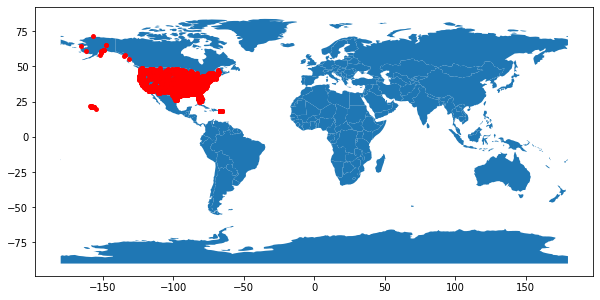

In [46]:
gdf = GeoDataFrame(pop_raw, geometry=[Point(x) for x in zip(pop_raw['Longitude'], pop_raw['Latitude'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

(array([4.164e+03, 7.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.160000e+02, 8.109860e+05, 1.621756e+06, 2.432526e+06,
        3.243296e+06, 4.054066e+06, 4.864836e+06, 5.675606e+06,
        6.486376e+06, 7.297146e+06, 8.107916e+06]),
 <BarContainer object of 10 artists>)

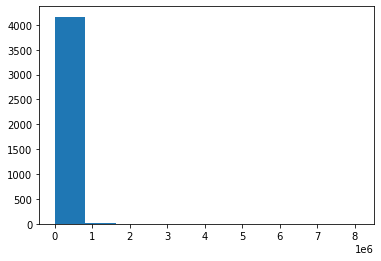

In [49]:
plt.hist(pop_raw['Population'])

(array([4.164e+03, 7.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.160000e+02, 8.109860e+05, 1.621756e+06, 2.432526e+06,
        3.243296e+06, 4.054066e+06, 4.864836e+06, 5.675606e+06,
        6.486376e+06, 7.297146e+06, 8.107916e+06]),
 <BarContainer object of 10 artists>)

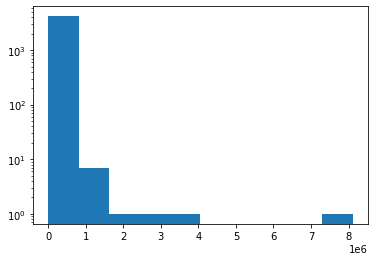

In [51]:
# let's try log scale
plt.yscale('log')
plt.hist(pop_raw['Population'])

## Region Selection
Due mostly to the uber eats data, we need to create a region for analysis. Let's create a box. Is that the NYC or Area (or both?) Let's look at all three on a map centered on the USA.

In [60]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world['name'] == "United States of America"]

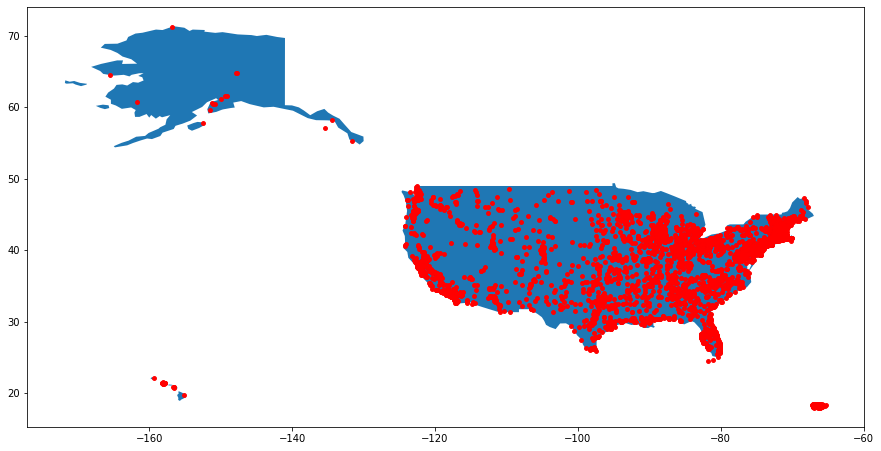

In [65]:
# population
gdf = GeoDataFrame(pop_raw, geometry=[Point(x) for x in zip(pop_raw['Longitude'], pop_raw['Latitude'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=usa.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

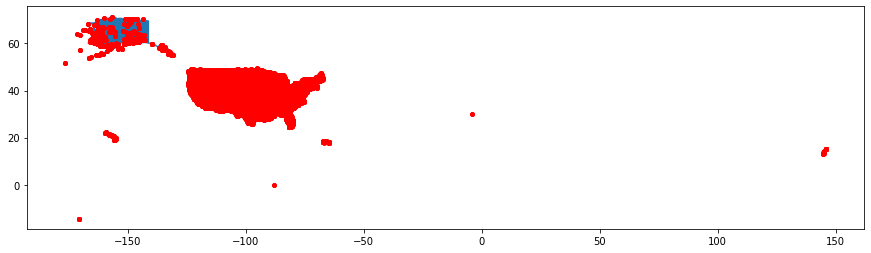

In [66]:
# cell towers
gdf = GeoDataFrame(towers_raw, geometry=[Point(x) for x in zip(towers_raw['londec'], towers_raw['latdec'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=usa.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

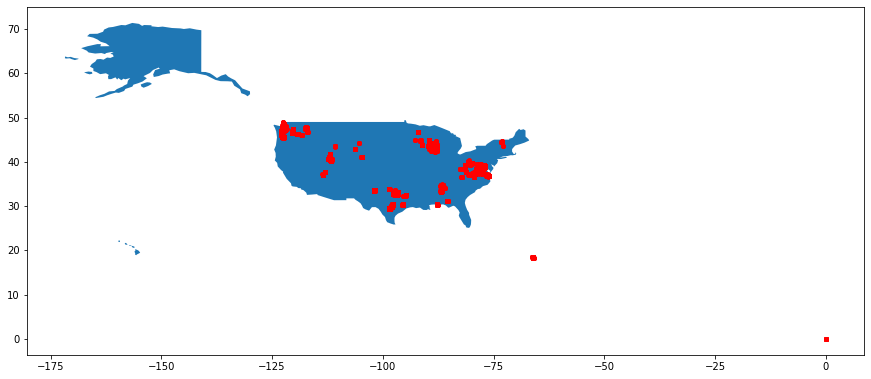

In [67]:
# uber eats
gdf = GeoDataFrame(rest_raw, geometry=[Point(x) for x in zip(rest_raw['lng'], rest_raw['lat'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=usa.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

### Setting a Bound, and looking at each dataset following that.
Washington DC has coordinates of 38.9, -77.0. Let's create a box to get the cluster data from the uber eats, and apply it to all of these.

In [72]:
rest_box_test = rest_raw[rest_raw['lng'] < -75]
rest_box_test = rest_box_test[rest_box_test['lng'] > -79]
rest_box_test = rest_box_test[rest_box_test['lat'] < 40.9]
rest_box_test = rest_box_test[rest_box_test['lat'] > 36.9]
print(rest_box_test.shape)

(5442, 12)


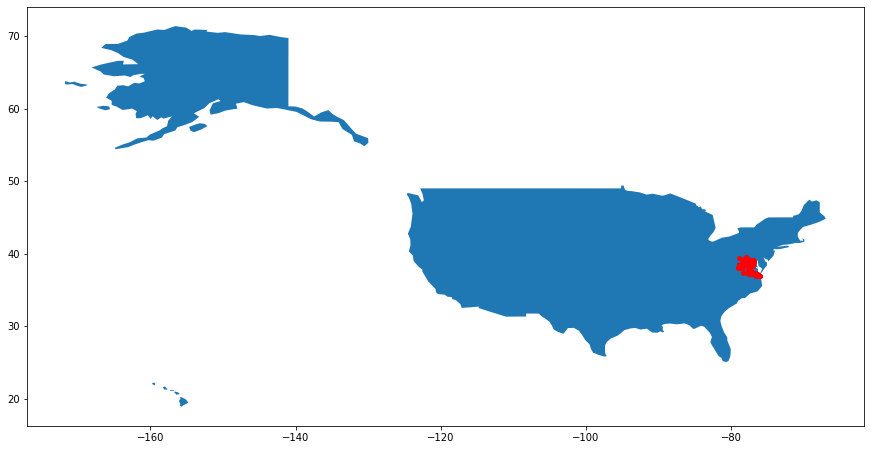

In [73]:
gdf = GeoDataFrame(rest_box_test, geometry=[Point(x) for x in zip(rest_box_test['lng'], rest_box_test['lat'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=usa.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

This seems like a reasonable region. Let's clean all up like this.

In [74]:
restaurants = rest_box_test

In [76]:
# cell towers
towers = towers_raw
towers = towers[towers['londec'] < -75]
towers = towers[towers['londec'] > -79]
towers = towers[towers['latdec'] < 40.9]
towers = towers[towers['latdec'] > 36.9]
print(towers.shape)

(1507, 30)


In [96]:
# populations
cities = pop_raw
cities = cities[cities['Longitude'] < -75]
cities = cities[cities['Longitude'] > -79]
cities = cities[cities['Latitude'] < 40.9]
cities = cities[cities['Latitude'] > 36.9]
print(cities.shape)

(243, 8)


(36.9, 40.9)

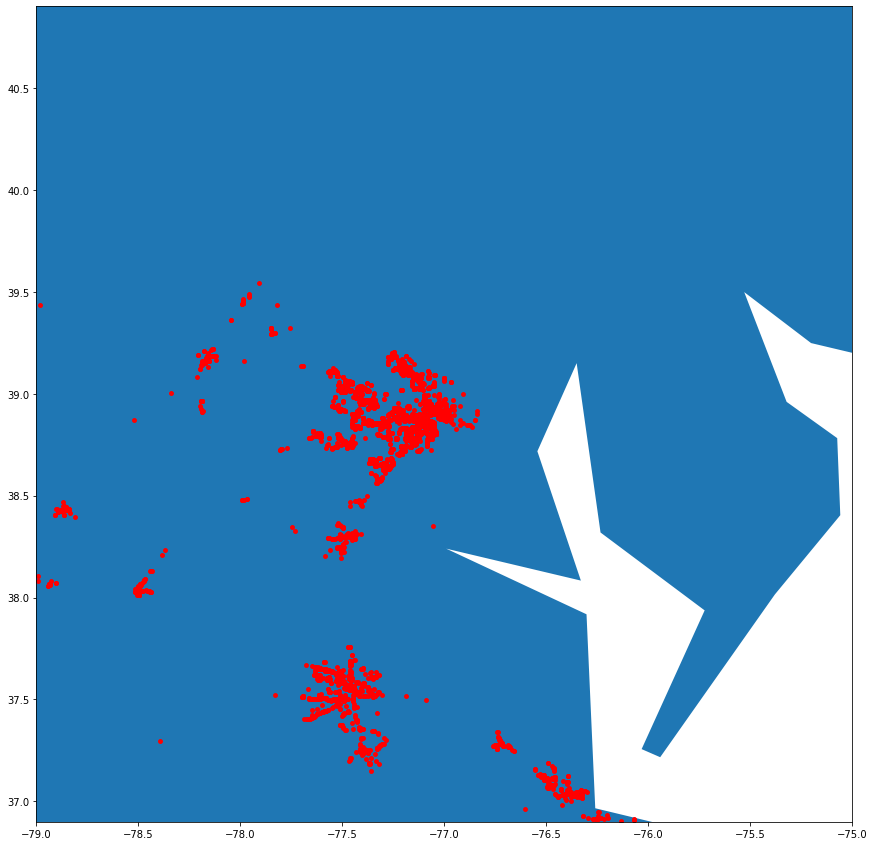

In [81]:
# Restaurants
gdf = GeoDataFrame(restaurants, geometry=[Point(x) for x in zip(restaurants['lng'], restaurants['lat'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=usa.plot(figsize=(15, 15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
ax.set_xlim(-79,-75)
ax.set_ylim(36.9,40.9)

(36.9, 40.9)

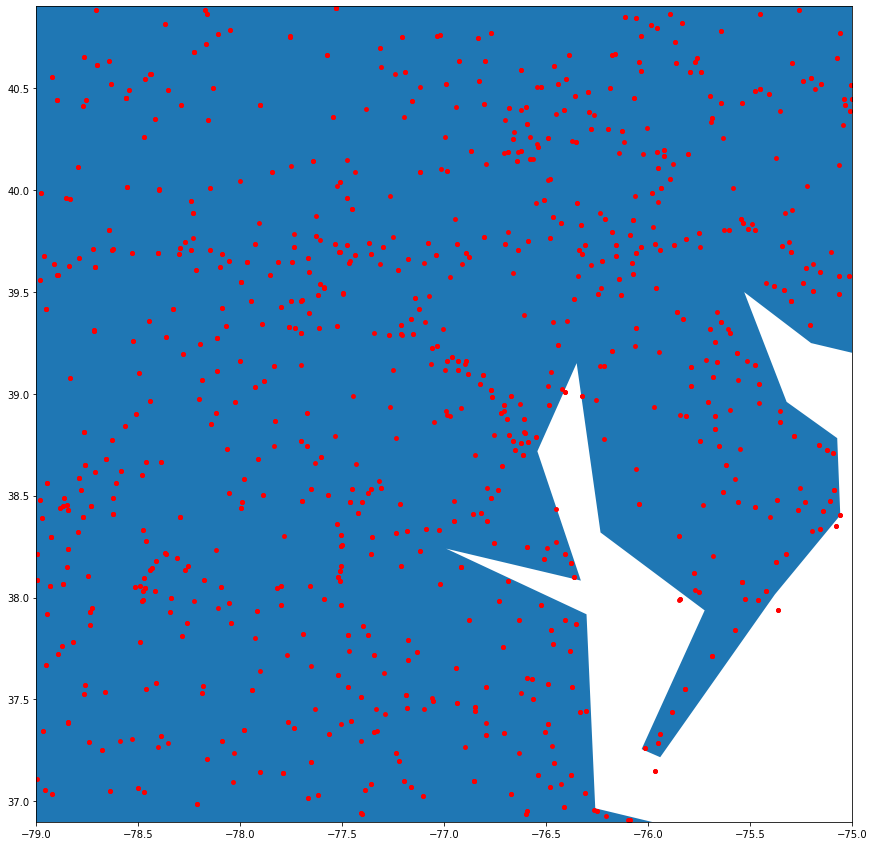

In [82]:
# Cell Towers
gdf = GeoDataFrame(towers, geometry=[Point(x) for x in zip(towers['londec'], towers['latdec'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=usa.plot(figsize=(15, 15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
ax.set_xlim(-79,-75)
ax.set_ylim(36.9,40.9)

(36.9, 40.9)

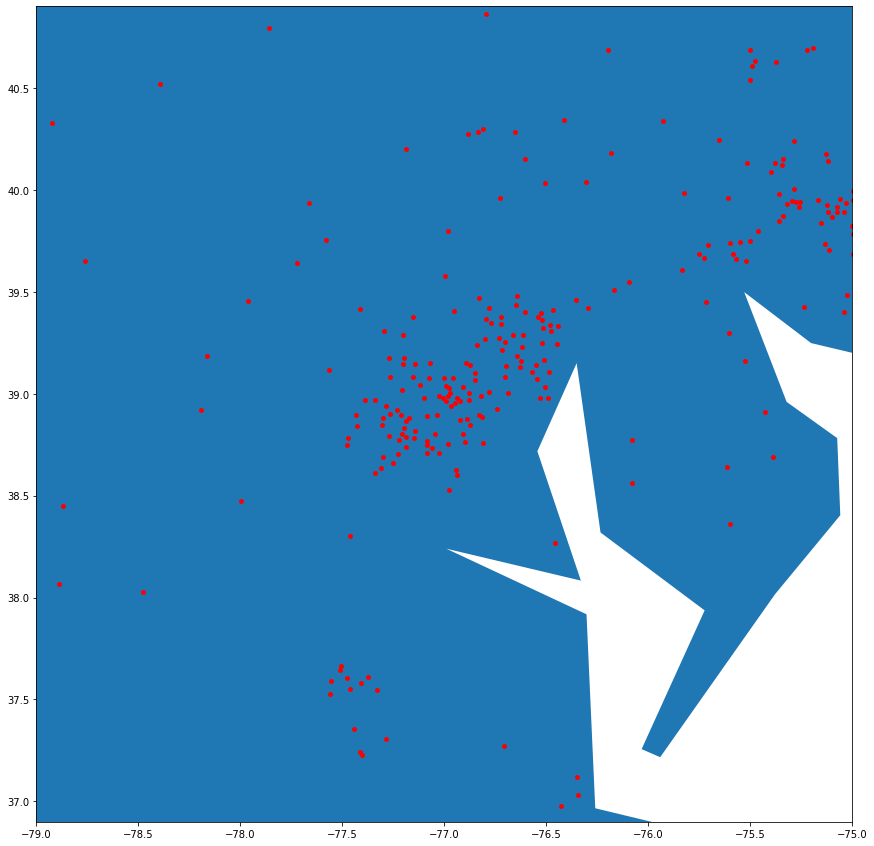

In [83]:
# Cities/Population
gdf = GeoDataFrame(cities, geometry=[Point(x) for x in zip(cities['Longitude'], cities['Latitude'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=usa.plot(figsize=(15, 15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
ax.set_xlim(-79,-75)
ax.set_ylim(36.9,40.9)

## Threshold for population
We want to have a notion of "population center", so let's find and set a threshold for the cities data for population.


         Population    Latitude   Longitude
count  2.190000e+02  219.000000  219.000000
mean   4.198003e+04   39.196287  -76.664537
std    1.127041e+05    0.765172    0.832555
min    1.002100e+04   36.978611  -78.922222
25%    1.460650e+04   38.855278  -77.196111
50%    2.213600e+04   39.145278  -76.820833
75%    3.635400e+04   39.693194  -76.325694
max    1.453268e+06   40.862500  -75.026111
places total 219
places with over 10,000 population 219
places with over 25,000 population 94
places with over 50,000 population 33


(36.9, 40.9)

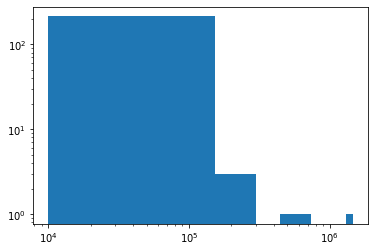

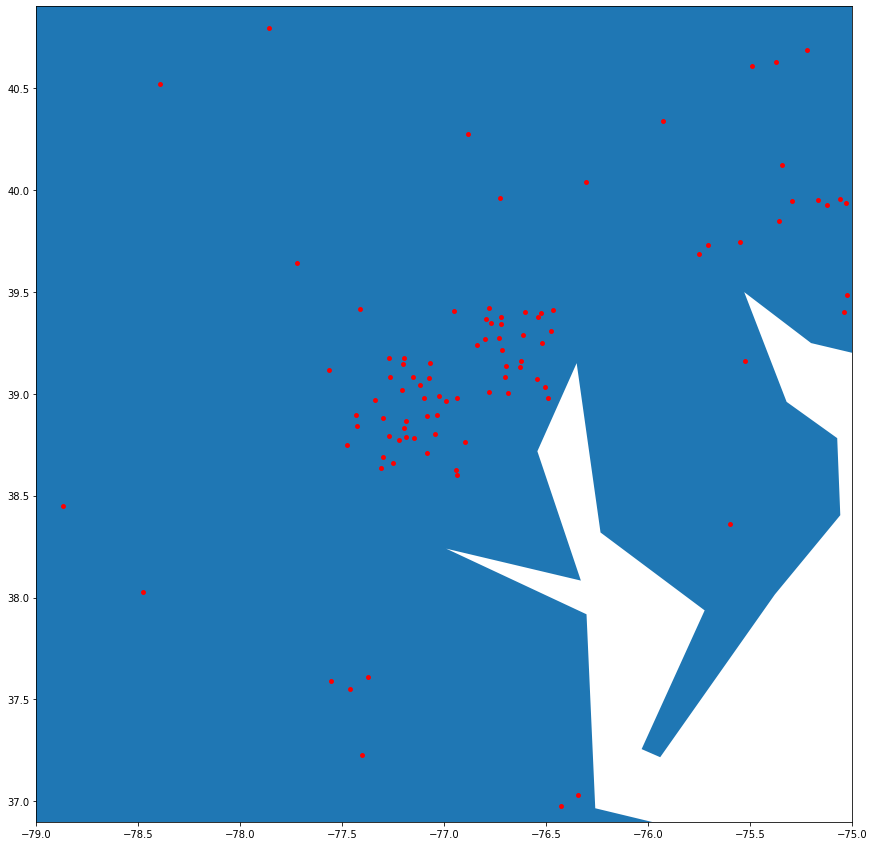

In [99]:
print(cities.describe())
plt.yscale('log')
plt.xscale('log')
plt.hist(cities['Population'])
print("places total", len(cities))
print("places with over 10,000 population", len(cities[cities['Population'] > 10000]))
print("places with over 25,000 population", len(cities[cities['Population'] > 25000]))
print("places with over 50,000 population", len(cities[cities['Population'] > 50000]))

cities = cities[cities['Population'] > 25000]

# Cities/Population with threshold
gdf = GeoDataFrame(cities, geometry=[Point(x) for x in zip(cities['Longitude'], cities['Latitude'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=usa.plot(figsize=(15, 15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
ax.set_xlim(-79,-75)
ax.set_ylim(36.9,40.9)


After some tuning, 25,000 seems to be reasonable for a threshold.

## Reflection on Cleanup
Well, this was less straight forward than expected. I was hoping to be able to do a larger analysis, but at least we have data all with the same bounds. 

# Models
Finally, we can get into the unsupervised machine learning methods.
First, I want to see how k-means clustering behaves on each dataset independently. For popluation centers and for restaurants, how will including rating and popluation respectively shift the results?

Next, let's try other clustering methods and see if through any of them, we can see patterns between these methods.


## K means on individual datasets

In [101]:
from sklearn.cluster import KMeans

## Hyperparameter Analysis
Let's look deeper at the restaurant data with ratings, and see how we can compare the performance as the hyperparameter, the number of clusters, changes.

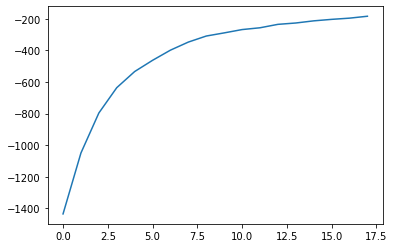

In [132]:
kmeans_scores = []
birch_scores = []
num_clusters = [i for i in range(2,20)]
# restaurant data with ratings
rest_cluster = restaurants[['lng', 'lat', 'score']].to_numpy()

for i in num_clusters:
    kmeans_scores.append(KMeans(n_clusters=i).fit(rest_cluster).score(rest_cluster))
    
plt.plot(kmeans_scores)

Using 5 clusters seems like a reasonable comprimise here.

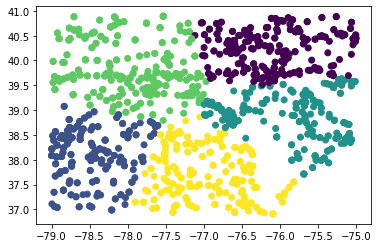

In [109]:
# cell data
towers_cluster = towers[['londec', 'latdec']].to_numpy()
cluster_res = KMeans(n_clusters=5).fit_predict(towers_cluster)
plt.scatter(towers_cluster[:,0], towers_cluster[:,1], c=cluster_res)

# KMeans

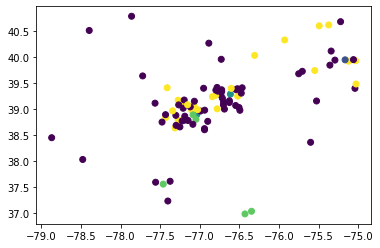

In [111]:
# population data with population
cities_cluster = cities[['Longitude', 'Latitude', 'Population']].to_numpy()
cluster_res = KMeans(n_clusters=5).fit_predict(cities_cluster)
plt.scatter(cities_cluster[:,0], cities_cluster[:,1], c=cluster_res)

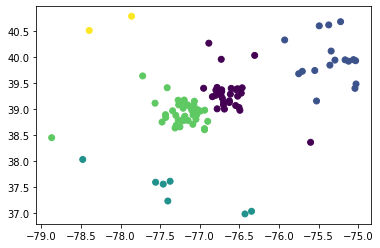

In [112]:
# population data without population
cities_cluster = cities[['Longitude', 'Latitude']].to_numpy()
cluster_res = KMeans(n_clusters=5).fit_predict(cities_cluster)
plt.scatter(cities_cluster[:,0], cities_cluster[:,1], c=cluster_res)

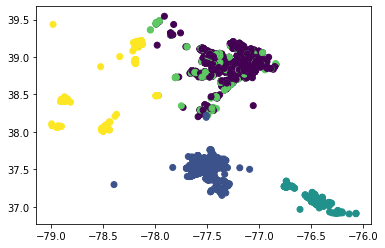

In [114]:
# restaurant data with ratings
rest_cluster = restaurants[['lng', 'lat', 'score']].to_numpy()
cluster_res = KMeans(n_clusters=5).fit_predict(rest_cluster)
plt.scatter(rest_cluster[:,0], rest_cluster[:,1], c=cluster_res)

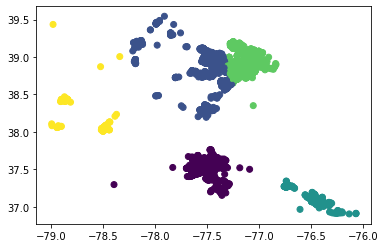

In [115]:
# restaurant data without ratings
rest_cluster = restaurants[['lng', 'lat']].to_numpy()
cluster_res = KMeans(n_clusters=5).fit_predict(rest_cluster)
plt.scatter(rest_cluster[:,0], rest_cluster[:,1], c=cluster_res)

## Alternate Clustering Methods and Metrics
We can us other clustering methods, of special consideration would be "BIRCH clustering" since data reduction is the sort of thing we're interested in.

In [121]:
from sklearn.cluster import Birch

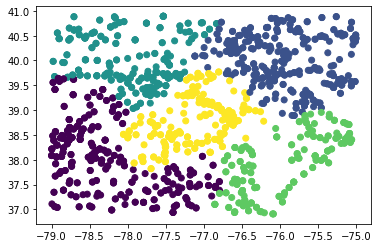

In [122]:
# cell data
towers_cluster = towers[['londec', 'latdec']].to_numpy()
cluster_res = Birch(n_clusters=5).fit_predict(towers_cluster)
plt.scatter(towers_cluster[:,0], towers_cluster[:,1], c=cluster_res)

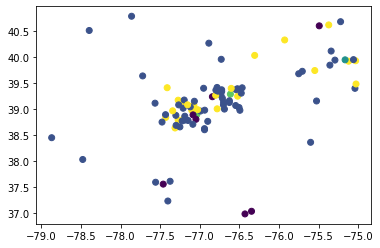

In [123]:
# population data with population
cities_cluster = cities[['Longitude', 'Latitude', 'Population']].to_numpy()
cluster_res = Birch(n_clusters=5).fit_predict(cities_cluster)
plt.scatter(cities_cluster[:,0], cities_cluster[:,1], c=cluster_res)

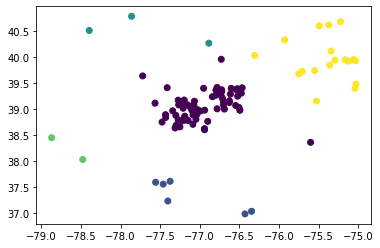

In [124]:
# population data without population
cities_cluster = cities[['Longitude', 'Latitude']].to_numpy()
cluster_res = Birch(n_clusters=5).fit_predict(cities_cluster)
plt.scatter(cities_cluster[:,0], cities_cluster[:,1], c=cluster_res)

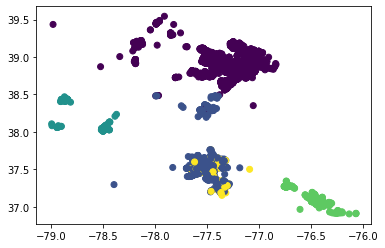

In [125]:
# restaurant data with ratings
rest_cluster = restaurants[['lng', 'lat', 'score']].to_numpy()
cluster_res = Birch(n_clusters=5).fit_predict(rest_cluster)
plt.scatter(rest_cluster[:,0], rest_cluster[:,1], c=cluster_res)

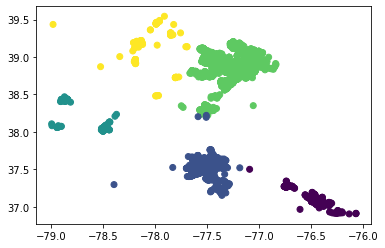

In [126]:
# restaurant data without ratings
rest_cluster = restaurants[['lng', 'lat']].to_numpy()
cluster_res = Birch(n_clusters=5).fit_predict(rest_cluster)
plt.scatter(rest_cluster[:,0], rest_cluster[:,1], c=cluster_res)

# Conclusions

Both KMeans and Birch performed well on the various geospatial datasets. From these clusters, we have an analysis of the spatial, along with some higher dimensional, relationships in population centers and service economy. Further work could be done to more directly compare the results of these datasets, such as working on the data indirectly through use of something like interpolation.